### Задание:
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.max_columns = 100

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

warnings.filterwarnings('ignore')

In [310]:
# Загружаем данные
data_train = pd.read_csv('input/train.csv')
data_test = pd.read_csv('input/test.csv')

### Data exploration and clear data

In [311]:
data_train.info()
# Видим, что есть пропущеные значения LifeSquare и Healthcare_1.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [312]:
data_test.info()
# Видим, аналогичную ситуацию с признаками LifeSquare и Healthcare_1,
# как в тренировочном датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [313]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [314]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [315]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Из описания видно, что Rooms, Square, LifeSquare, KitchenSquare, HouseFloor содержат максимальные значения, которые 
возможно, являются выборосами, т.к. они физически невозможны.

Рассмотрим каждый признка по отдельности.

#### Rooms

In [316]:
data_train.loc[((data_train['Rooms'] > 5) | (data_train['Rooms'] == 0)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646


In [317]:
data_train.loc[(((data_train['Rooms'] == 5) | (data_train['Rooms'] == 4)) & (data_train['Square'] < 50)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,206148.845716
8551,13772,96,4.0,44.128947,18.212628,10.0,10,13.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,201374.604049


In [318]:
data_test.loc[(((data_test['Rooms'] == 5) | (data_test['Rooms'] == 4)) & (data_test['Square'] < 50)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
263,11407,79,4.0,37.920348,21.357487,6.0,6,17.0,2014,0.307467,B,A,30,5048,9,325.0,2,5,B


In [319]:
data_test.loc[((data_test['Rooms'] > 5) | (data_test['Rooms'] == 0)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


Видим, что есть выбросы. Первое, что приходит в голову то изменить значения выбросов в соответствии
с средней площадью комнат, но есть квартиры с c Id:3159, 3224 у которых нам будетс сложно подобрать через
среднюю площадь значения, потому будем их исправлять в ручную.

Посмотрим значения медиан площадей, в зависимости от количества комнат.

In [320]:
data_median_square = data_train.groupby(['Rooms'], as_index=False)[['Square']].median().\
                                        rename(columns={'Square': 'median_square'})
data_median_square

,Rooms,median_square
0,0.0,65.487474
1,1.0,40.406590
2,2.0,55.841812
3,3.0,77.413643
4,4.0,98.668054
5,5.0,116.084861
6,6.0,59.414334
7,10.0,59.964120
8,19.0,42.006046


Квартиры, у которых по площади мы не можем определить количество комнат, заполним вручную.
Квартира с Id 3159, похожа на однокомнатную квартиру.

In [321]:
data_train.loc[data_train['Id'] == 3159, 'Rooms'] = 1  

Найдем среднее значение комнат по району и году постройки, округлим это значение 
и запишем значение количества комнтат для квартиры с Id 3224

In [322]:
data_median_rooms = data_train.groupby(['DistrictId', 'HouseYear'], as_index=False)[['Rooms']].mean().rename(columns={'Rooms': 'mean_rooms'})
data_median_rooms.loc[((data_median_rooms['DistrictId'] == 27) & (data_median_rooms['HouseYear'] == 1977)), :]

,DistrictId,HouseYear,mean_rooms
695,27,1977,1.761905


In [323]:
data_train.loc[data_train['Id'] == 3224, 'Rooms'] = 2

#### Clear Square, LifeSquare, KitchenSquare

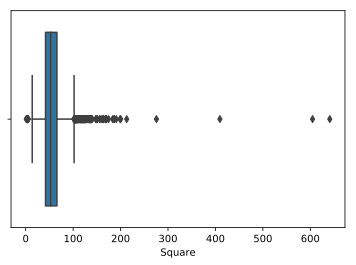

In [324]:
sns.boxplot(data_train['Square']);

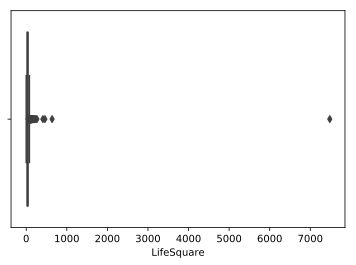

In [325]:
sns.boxplot(data_train['LifeSquare']);

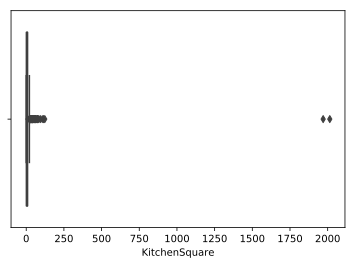

In [326]:
sns.boxplot(data_train['KitchenSquare']);

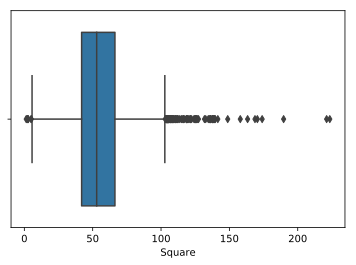

In [327]:
sns.boxplot(data_test['Square']);

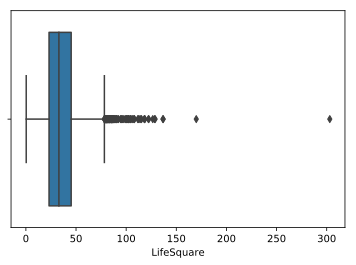

In [328]:
sns.boxplot(data_test['LifeSquare']);

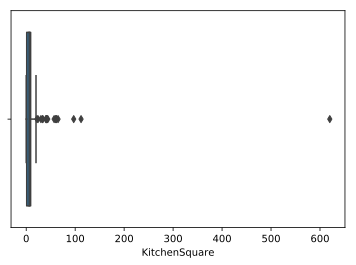

In [329]:
sns.boxplot(data_test['KitchenSquare']);

#### Foor and HouseFloor

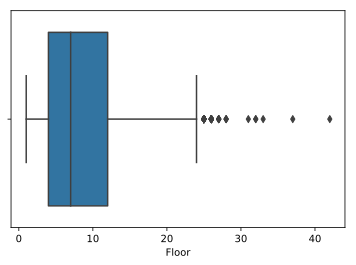

In [330]:
sns.boxplot(data_train['Floor']);

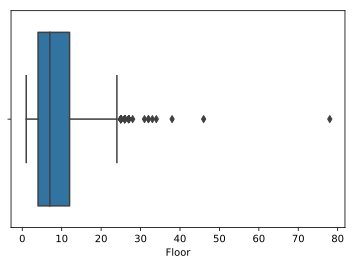

In [331]:
sns.boxplot(data_test['Floor']);

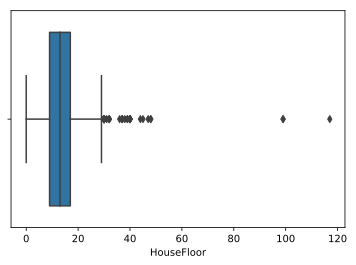

In [332]:
sns.boxplot(data_train['HouseFloor']);

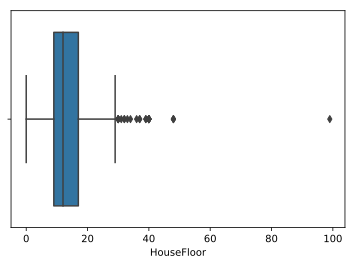

In [333]:
sns.boxplot(data_test['HouseFloor']);

Видим, что есть выбросы, посмотрим их подробнее.

In [334]:
data_train.loc[((data_train['Floor'] > 48) | (data_train['HouseFloor'] > 48)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [335]:
data_test.loc[((data_test['Floor'] > 48) | (data_test['HouseFloor'] > 48)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4698,15759,17,2.0,57.601870,37.744743,10.0,78,22.0,1989,0.000000,B,B,25,5027,4,46.0,1,1,B


Видим, что есть небольшое количество выбросов, поэтому исправим их вручную

In [336]:
data_train.loc[data_train['Id'].isin([10806, 9300]), 'HouseFloor'] = 9
data_train.loc[data_train['Id'] == 78, 'HouseFloor'] = 17
data_test.loc[data_test['Id'] == 15759, 'Floor'] = 18

Найдем максимальное значение HouseFloor по году и району и заполним этим значением 
выбоброс поле HouseFloor в датасете test

In [337]:
data_stat1 = data_train.groupby(['HouseYear', 'DistrictId'], as_index=False)[['HouseFloor']].max().\
                                rename(columns={'HouseFloor': 'HouseFloor'})
data_stat1.loc[((data_stat1['HouseYear'] == 1977) & (data_stat1['DistrictId'] == 27)), :]

,HouseYear,DistrictId,HouseFloor
1413,1977,27,25.0


In [338]:
data_test.loc[data_test['Id'] == 15864, 'HouseFloor'] = 17

#### HouseYear

In [339]:
data_train.loc[((data_train['HouseYear'] > 2020) | (data_train['HouseYear'] < 1900)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [340]:
data_test.loc[((data_test['HouseYear'] > 2020) | (data_test['HouseYear'] < 1900)), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


Исправим значения вручную
Данные, в которых одни едииницы, не изменяем.

In [341]:
data_train.loc[data_train['HouseYear'] == 20052011, 'HouseYear'] = 2008
data_train.loc[data_train['HouseYear'] == 4968, 'HouseYear'] = 1968

### train_test_split

In [342]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(data_train, test_size=0.3, random_state=42)
train.shape, valid.shape

((7000, 20), (3000, 20))

### Clear data

Напишем функцию, которая будет проверять, если квартиры в которых кличество комнат
больше 5 или равно 0, то смотрим диапазон м/д медианами площадей для количества комнат,
и если площадь попадает в диапазон, то меняем значение количества комнат.

In [343]:
def clean_rooms(df, source_df):
    df.loc[(((df['Rooms'] == 5) | (df['Rooms'] == 4)) & (df['Square'] < 50)), 'Rooms'] = 1
    mean_square = source_df.groupby('Rooms', as_index=False)[['Square']].median().\
                                    rename(columns={'Square': 'median_square'})
    
    for i in range(1, 5): 
        df.loc[(~df.Rooms.between(1,5)) & 
                       (df.Square > mean_square.loc[mean_square.Rooms==i, 'median_square'].values[0]) & 
                       (df.Square <= mean_square.loc[mean_square.Rooms==i+1, 'median_square'].values[0]), 'Rooms'] = i
    df.loc[(df.Square > mean_square.loc[mean_square.Rooms==i+1, 'median_square'].values[0]), 'Rooms'] = 5
    return df

Напишем функцию, которая будет принимать на вход наши данные и если 
значения в толбцах 'Square','LifeSquare','KitchenSquare' будет меньше, или больше, чем это возможно, то мы будем их заменять медианным значением, в зависимости от количества комнат.

Перед очисткой данных заполним столбец 'LifeSquare' медианой.

Цифры для порогов площадей я взял из Интернета с сайта агенства недвижимости ЦАН.

Физически невозможно, чтобы жилая площадь была больше площади квартиры, 
потому если у нас встретятся такие значения мы эти значения, заменим,
умножив их на 0.65. 
К жилой площади у нас относятся только жилые комнаты.

In [344]:
def clean_square(df, source_df, name_column, min_sq, large_sq):
    if name_column == 'LifeSquare':
        median_square = source_df.groupby(['Rooms'], as_index=False)[['LifeSquare']].median().\
                                        rename(columns={'LifeSquare': 'median_square'})
        df = pd.merge(df, median_square, on='Rooms', how='left')
        df['LifeSquare'] = df['LifeSquare'].fillna(df['median_square'])
    else:
        median_square = source_df.groupby('Rooms', as_index=False)[[name_column]].median().rename(columns={name_column: 'median_square'})
        df = pd.merge(df, median_square, on='Rooms', how='left')
    small_square_ids_train = df.loc[df[name_column] < min_sq, 'Id'].values
    df.loc[df['Id'].isin(small_square_ids_train), name_column] = df['median_square']
    large_square_ids_train = df.loc[df[name_column] > large_sq, 'Id'].values
    df.loc[df['Id'].isin(large_square_ids_train), name_column] = df['median_square']
    df.drop('median_square', axis=1, inplace=True)
    return df

In [345]:
def clean_large_life_square(df):
    df.loc[(df['Square'] < df['LifeSquare']), 'LifeSquare' ] = df['LifeSquare'].apply(lambda x: x*0.65)
    return df

In [346]:
def clean_data(df, source_df=train, min_sq=28, large_sq=150, min_life_sq=15, large_life_sq=120, min_kitch_sq=5, large_kitch_sq=30, 
               name_column1='Square', name_column2='LifeSquare', name_column3='KitchenSquare'):
    df = clean_rooms(df, source_df)
    df = clean_square(df, source_df, name_column1, min_sq, large_sq)
    df = clean_square(df, source_df, name_column2, min_life_sq, large_life_sq)
    df = clean_square(df, source_df, name_column3, min_kitch_sq, large_kitch_sq)
    df = clean_large_life_square(df)
    return df

In [347]:
train = clean_data(train)
valid = clean_data(valid)

### Prepare train, valid

In [348]:
house_year_info1 = train['HouseYear'].value_counts(normalize=True).reset_index().rename(columns={'index':'HouseYear', 
                                                                               'HouseYear':'normal_HouseYear'})

In [349]:
def add_house_year_info1(df, house_year_info1):
    df = pd.merge(df, house_year_info1, on='HouseYear', how='left')
    df['normal_HouseYear'] = df['normal_HouseYear'].fillna(0.000143)
    return df

In [350]:
distr_info1 = train['DistrictId'].value_counts(normalize=True).reset_index().rename(columns={'index':'DistrictId', 
                                                                               'DistrictId':'flat_qty_distr'})

In [351]:
def add_district_info1(df, distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['flat_qty_distr'] = df['flat_qty_distr'].fillna(0.000143)
    return df

In [352]:
def add_cat_fts(df, cat_fts=('Ecology_2', 'Ecology_3', 'Shops_2')):
    for col in cat_fts:
        df[col] = (df[col] == 'B').astype(int)
    return df

In [353]:
def fillna_healthcare_1(df):
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    return df

In [354]:
def prepare_data(df, distr_info1=distr_info1, house_year_info1=house_year_info1):
    df = add_cat_fts(df)
    df = fillna_healthcare_1(df)
    df = add_district_info1(df, distr_info1)
    df = add_house_year_info1(df, house_year_info1)
    return df

In [355]:
train = prepare_data(train)
valid = prepare_data(valid)

In [356]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,flat_qty_distr,normal_HouseYear
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.904857,56.244893,34.523571,7.464714,8.521286,12.614571,1984.919286,0.117840,0.990857,0.971143,24.767571,5364.425714,8.044571,589.939571,1.313143,4.260571,0.916571,214449.167390,0.023947,0.081846
std,4864.141324,43.744178,0.853511,18.351016,14.040389,2.248121,5.222043,6.577227,18.310039,0.118599,0.095187,0.167417,17.583889,4011.768297,23.869975,927.590901,1.488326,4.825024,0.276549,92924.798790,0.026295,0.112188
min,0.000000,0.000000,1.000000,28.091273,15.001234,5.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000143,0.000143
25%,4176.500000,19.000000,1.000000,41.752869,22.205148,6.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,1.000000,154599.240157,0.005714,0.009714
50%,8398.500000,37.000000,2.000000,52.665690,32.575747,7.000000,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,1.000000,192290.039215,0.010429,0.016429
75%,12562.000000,75.000000,2.000000,65.985903,43.143463,9.000000,12.000000,17.000000,2001.000000,0.194489,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249080.956886,0.050714,0.267286
max,16796.000000,209.000000,5.000000,148.179026,117.446940,30.000000,42.000000,48.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,627525.072788,0.082000,0.267286


In [357]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,flat_qty_distr,normal_HouseYear
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8377.215000,50.027333,1.903333,56.147881,34.640201,7.393000,8.539333,12.504000,1984.741667,0.121232,0.98900,0.975667,24.499000,5323.531333,8.026667,605.270667,1.334333,4.163000,0.919667,213414.800753,0.024354,0.080076
std,4847.850029,43.224970,0.838783,18.368882,14.122037,2.154089,5.286313,6.596652,18.649795,0.119999,0.10432,0.154108,17.413857,3995.703779,23.746703,942.648473,1.505980,4.762561,0.271854,92761.108274,0.026806,0.111269
min,2.000000,0.000000,1.000000,28.333221,15.168644,5.000000,1.000000,0.000000,1910.000000,0.000000,0.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59877.592523,0.000143,0.000143
25%,4153.750000,21.000000,1.000000,41.864637,22.206376,6.000000,4.000000,9.000000,1973.000000,0.019509,1.00000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.000000,1.000000,1.000000,151954.236807,0.005714,0.009714
50%,8390.500000,34.000000,2.000000,52.212172,32.575747,7.000000,7.000000,12.000000,1977.000000,0.075779,1.00000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.000000,3.000000,1.000000,192054.173699,0.010429,0.016286
75%,12656.250000,74.000000,2.000000,65.804098,43.640067,9.000000,12.000000,17.000000,2002.000000,0.195781,1.00000,1.000000,35.000000,7227.000000,5.000000,1015.000000,3.000000,5.000000,1.000000,250052.147507,0.050714,0.267286
max,16798.000000,208.000000,5.000000,148.671938,118.048978,29.000000,37.000000,48.000000,2020.000000,0.521867,1.00000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,0.082000,0.267286


### Model

In [358]:
from sklearn.metrics import r2_score as r2

In [359]:
feats = ['DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'flat_qty_distr', 'normal_HouseYear']

In [360]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
KNR_m = KNeighborsRegressor(n_neighbors=4, leaf_size=17)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, max_features=3, min_samples_leaf=2)

In [361]:
def create_model(df_train, df_valid, model, feats, check_rf='No', check_r2='Yes'):
    if check_rf == 'Yes':
        model.fit(df_train.loc[:, feats], df_train['Price'].values.ravel())
    else:
        model.fit(df_train.loc[:, feats], df_train['Price'])
    pred_valid = model.predict(df_valid.loc[:, feats])

    if check_r2 == 'Yes':
        r2_ = r2(df_valid['Price'], pred_valid)
        print(f'R2: {r2_}')
    return (pred_valid)

In [362]:
pred_lr = create_model(train, valid, lr, feats)

R2: 0.5670037223038604


In [363]:
pred_KNR = create_model(train, valid, KNR_m, feats)

R2: 0.6092965618226148


In [364]:
pred_rf = create_model(train, valid, rf, feats, check_rf='Yes')

R2: 0.7164010813248443


### Выбираем алгоритм RandomForest

Запускал закомментированный ниже GridSearchCV, он показал мне наилучшие параметры:
best params = {'max_depth': 14, 'max_features': 5, 'n_estimators': 300}

In [365]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_estimators': [150, 200, 250, 300], 
#                'max_features': np.arange(5, 9),
#                'max_depth': np.arange(5, 15)}]
    
# clf = GridSearchCV(estimator=RandomForestRegressor(random_state=42, min_samples_leaf=2), 
#                    param_grid=parameters,
#                    cv=5)

# clf.fit(train.loc[:, feats], train['Price'].values.ravel())
# print(f'best params = {clf.best_params_}')

# best params = {'max_depth': 14, 'max_features': 5, 'n_estimators': 300}

In [366]:
rf = RandomForestRegressor(n_estimators=300, max_depth=14, random_state=42, max_features=5, min_samples_leaf=2)
pred_rf = create_model(train, valid, rf, feats, check_rf='Yes')

R2: 0.7232741860771413


### Test

In [367]:
data_test = clean_data(data_test)
data_test = prepare_data(data_test)
data_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,flat_qty_distr,normal_HouseYear
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.916800,56.510318,34.723423,7.396400,8.620000,12.584600,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.917600,0.023402,0.079961
std,4832.674037,44.179466,0.830672,18.360120,13.873332,2.139575,5.396353,6.678605,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001,0.026187,0.111117
min,1.000000,0.000000,1.000000,28.025001,15.019807,5.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000143,0.000143
25%,4221.750000,21.000000,1.000000,41.912403,22.626743,6.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.005286,0.009714
50%,8320.500000,37.000000,2.000000,52.924953,32.575747,7.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,1.000000,0.009429,0.016286
75%,12598.250000,77.000000,2.000000,66.285129,43.388738,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,0.050714,0.267286
max,16795.000000,212.000000,5.000000,148.783492,118.667210,30.000000,46.000000,48.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,0.082000,0.267286


In [369]:
data_test['Price'] = create_model(train, data_test, rf, feats, check_r2='No', check_rf='Yes')

In [370]:
data_test.loc[:, ['Id', 'Price']].to_csv('AAndoskin_predictions.csv', index=None)